In [2]:
!pip install Keras --use-feature=2020-resolver

  Using cached Keras-2.4.3-py2.py3-none-any.whl (36 kB)


In [3]:
!pip install tensorflow --user

  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached tensorboard-2.4.1-py3-none-any.whl (10.6 MB)


In [4]:
!pip install sklearn

  Using cached sklearn-0.0.tar.gz (1.1 kB)
  Using cached threadpoolctl-2.1.0-py3-none-any.whl (12 kB)
  Using cached joblib-1.0.1-py3-none-any.whl (303 kB)
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1316 sha256=8d8160f5a296768e5a8da05578d40724a47c63326f18d16e3c1aa9d5b544f0f6
  Stored in directory: c:\users\zach\appdata\local\pip\cache\wheels\e4\7b\98\b6466d71b8d738a0c547008b9eb39bf8676d1ff6ca4b22af1c
Successfully built sklearn


In [1]:
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


In [2]:
# load the dataset
df = pd.read_csv('corona_tested_individuals_ver_0083.english.csv')
print(df.head())

C:\Users\Zach\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    test_date  cough  fever  sore_throat  shortness_of_breath  head_ache  \
0  2020-11-12      0      0            0                    0          0   
1  2020-11-12      0      1            0                    0          0   
2  2020-11-12      0      0            0                    0          0   
3  2020-11-12      0      0            0                    0          0   
4  2020-11-12      0      1            0                    0          0   

  corona_result age_60_and_above  gender         test_indication  
0      negative               No    male                   Other  
1      negative               No    male                   Other  
2      negative              Yes  female                   Other  
3      nega

In [3]:
def genderToBinary (row):
    if row['gender'] == 'male':
        return 0
    elif row['gender'] == 'female':
        return 1

df['gender'] = df.apply(lambda row: genderToBinary(row), axis=1)
df.head()

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
0,2020-11-12,0,0,0,0,0,negative,No,0.0,Other
1,2020-11-12,0,1,0,0,0,negative,No,0.0,Other
2,2020-11-12,0,0,0,0,0,negative,Yes,1.0,Other
3,2020-11-12,0,0,0,0,0,negative,No,0.0,Other
4,2020-11-12,0,1,0,0,0,negative,No,0.0,Contact with confirmed


In [4]:
def ageToBinary (row):
    if row['age_60_and_above'] == 'No':
        return 0
    elif row['age_60_and_above'] == 'Yes':
        return 1

df['age_60_and_above'] = df.apply(lambda row: ageToBinary(row), axis=1)
df.head()

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
0,2020-11-12,0,0,0,0,0,negative,0.0,0.0,Other
1,2020-11-12,0,1,0,0,0,negative,0.0,0.0,Other
2,2020-11-12,0,0,0,0,0,negative,1.0,1.0,Other
3,2020-11-12,0,0,0,0,0,negative,0.0,0.0,Other
4,2020-11-12,0,1,0,0,0,negative,0.0,0.0,Contact with confirmed


In [5]:
def labelToBinary (row):
    if row['corona_result'] == 'negative':
        return 0
    elif row['corona_result'] == 'positive':
        return 1

df['corona_result'] = df.apply(lambda row: labelToBinary(row), axis=1)
df.head()

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
0,2020-11-12,0,0,0,0,0,0.0,0.0,0.0,Other
1,2020-11-12,0,1,0,0,0,0.0,0.0,0.0,Other
2,2020-11-12,0,0,0,0,0,0.0,1.0,1.0,Other
3,2020-11-12,0,0,0,0,0,0.0,0.0,0.0,Other
4,2020-11-12,0,1,0,0,0,0.0,0.0,0.0,Contact with confirmed


In [6]:
df['test_indication'].describe()

count     2742596
unique          3
top         Other
freq      2547559
Name: test_indication, dtype: object

In [7]:
y = pd.get_dummies(df.test_indication, prefix='test_indication')
print(y.head())

   test_indication_Abroad  test_indication_Contact with confirmed  \
0                       0                                       0   
1                       0                                       0   
2                       0                                       0   
3                       0                                       0   
4                       0                                       1   

   test_indication_Other  
0                      1  
1                      1  
2                      1  
3                      1  
4                      0  


In [8]:
df['test_indication_Abroad'] = y['test_indication_Abroad']
df['test_indication_Contact'] = y['test_indication_Contact with confirmed']
df['test_indication_Other'] = y['test_indication_Other']
df = df.drop('test_indication', axis=1)
df = df.drop('test_date', axis=1)
df = df.dropna()

In [9]:
df.head()

,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication_Abroad,test_indication_Contact,test_indication_Other
0,0,0,0,0,0,0.0,0.0,0.0,0,0,1
1,0,1,0,0,0,0.0,0.0,0.0,0,0,1
2,0,0,0,0,0,0.0,1.0,1.0,0,0,1
3,0,0,0,0,0,0.0,0.0,0.0,0,0,1
4,0,1,0,0,0,0.0,0.0,0.0,0,1,0


In [10]:
features = df.drop('corona_result', axis=1)
labels = df['corona_result']
print(len(features.columns))

In [11]:
features.head()

,cough,fever,sore_throat,shortness_of_breath,head_ache,age_60_and_above,gender,test_indication_Abroad,test_indication_Contact,test_indication_Other
0,0,0,0,0,0,0.0,0.0,0,0,1
1,0,1,0,0,0,0.0,0.0,0,0,1
2,0,0,0,0,0,1.0,1.0,0,0,1
3,0,0,0,0,0,0.0,0.0,0,0,1
4,0,1,0,0,0,0.0,0.0,0,1,0


In [12]:
labels.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: corona_result, dtype: float64

In [13]:
X  = features.values
y = labels.values

In [14]:
encoder = LabelEncoder()
encoder.fit(y)
encoded_Y = encoder.transform(y)

In [15]:
# baseline model
def create_baseline():
	# create model
	model = Sequential()
	model.add(Dense(12, input_dim=10, activation='relu'))
	model.add(Dense(12, activation='relu'))
	model.add(Dense(1, activation='sigmoid'))
	# Compile model
	model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
	# Print model summary
	print(model.summary())
	return model

In [18]:
test_df = pd.read_csv('corona_tested_individuals_ver_006.english.csv')
print(test_df.head())

    test_date cough fever sore_throat shortness_of_breath head_ache  \
0  2020-04-30     0     0           0                   0         0   
1  2020-04-30     1     0           0                   0         0   
2  2020-04-30     0     1           0                   0         0   
3  2020-04-30     1     0           0                   0         0   
4  2020-04-30     1     0           0                   0         0   

  corona_result age_60_and_above  gender test_indication  
0      negative             None  female           Other  
1      negative             None  female           Other  
2      negative             None    male           Other  
3      negative             None  female           Other  
4      negative             None    male           Other  
C:\Users\Zach\anaconda3\envs\titanic\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (1,2,3,4,5) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = awa

In [19]:
test_df['gender'] = test_df.apply(lambda row: genderToBinary(row), axis=1)
test_df['age_60_and_above'] = test_df.apply(lambda row: ageToBinary(row), axis=1)
test_df['corona_result'] = test_df.apply(lambda row: labelToBinary(row), axis=1)
y = pd.get_dummies(test_df.test_indication, prefix='test_indication')
test_df['test_indication_Abroad'] = y['test_indication_Abroad']
df['test_indication_Contact'] = y['test_indication_Contact with confirmed']
test_df['test_indication_Other'] = y['test_indication_Other']
test_df = test_df.drop('test_indication', axis=1)
test_df = test_df.drop('test_date', axis=1)
test_df = test_df.dropna()

In [23]:
test_df['corona_result']

122808    0.0
122809    1.0
122810    0.0
122811    0.0
122812    0.0
         ... 
265116    0.0
265117    0.0
265118    0.0
265119    0.0
265120    0.0
Name: corona_result, Length: 136537, dtype: float64

In [16]:
estimator = KerasClassifier(build_fn=create_baseline, epochs=2, batch_size=100, verbose=1)
estimator.fit(X,y)

Epoch 1/2
21519/21519 [==============================] - 24s 1ms/step - loss: 0.2252 - accuracy: 0.9247
Epoch 2/2
21519/21519 [==============================] - 24s 1ms/step - loss: 0.2106 - accuracy: 0.9295


In [17]:
test_features = df.drop('corona_result', axis=1)
test_labels = df['corona_result']

In [18]:
X  = test_features.values

In [21]:
test_pred = estimator.predict(X)

21519/21519 [==============================] - 14s 666us/step


In [22]:
test_pred

array([[0.],
       [1.],
       [0.],
       ...,
       [1.],
       [0.],
       [0.]])

In [23]:
test_labels

0          0.0
1          0.0
2          0.0
3          0.0
4          0.0
          ... 
2731639    1.0
2731640    0.0
2731643    0.0
2731644    0.0
2731647    0.0
Name: corona_result, Length: 2151898, dtype: float64

In [34]:
from matplotlib import pyplot as plt

import numpy as np

In [90]:
cm = confusion_matrix(np.array(test_labels), test_pred.squeeze())
print(cm)

[[1876524   66648]
 [  84936  123790]]


<AxesSubplot:>

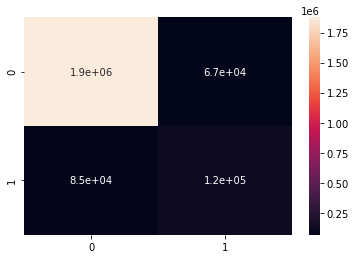

In [91]:
pd.DataFrame(cm, index = ['positive','negative'], columns = ['positive','negative'])
import seaborn as sn
sn.heatmap(cm, annot=True)

In [44]:
!pip install seaborn

In [84]:
cm = cm / 1876524

In [85]:
cm

array([[1.        , 0.03551673],
       [0.04526241, 0.06596771]])

<AxesSubplot:>

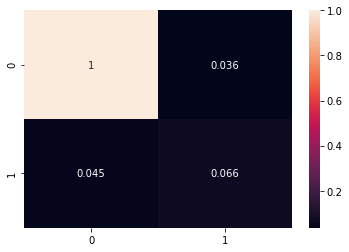

In [89]:
sn.heatmap(cm, annot=True)

In [92]:
from sklearn.metrics import precision_recall_fscore_support

precision_recall_fscore_support(test_labels, test_pred, average='macro')

(0.8033626963000796, 0.7793878072671655, 0.7907123652935875, None)

In [93]:
from sklearn.metrics import accuracy_score

accuracy_score(test_labels, test_pred)

0.9295579994962586